In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  all


       | 
       | Downloading package abc to /usr/share/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /usr/share/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /usr/share/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /usr/share/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to
       |     /usr/share/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to
       |     /usr/share/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to
       |     /usr/share/nltk_data...
       |   Package bllip_wsj_no_aux is already up-to-date!
       | Down


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

**Loading Data**

In [3]:
df= pd.read_csv("../input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns = ["target","id","date","flag","user","text"]
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [7]:
df = df[['target','text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
df_pos = df[df['target'] == 4]
df_neg = df[df['target'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [9]:
df_pos = df_pos.iloc[:int(len(df_pos)/4)]
df_neg = df_neg.iloc[:int(len(df_neg)/4)]
print(len(df_pos), len(df_neg))

200000 200000


In [10]:
df = pd.concat([df_pos, df_neg])
len(df)

400000

## Data Preprocessing
**Tokenization**

In [11]:
tk = TweetTokenizer(reduce_len=True)

data = []

X = df['text'].tolist()
Y = df['target'].tolist()

for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))

data[:5]

[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  1),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  1),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  1),
 (['Being',
   'sick',
   'can',
   'be',
   'really',
   'cheap',
   'when',
   'it',
   'hurts',
   'too',
   'much',
   'to',
   'eat',
   'real',
   'food',
   'Plus',
   ',',
   'your',
   'friends',
   'make',
   'you',
   'soup'],
  1),
 (['@LovesBrooklyn2', 'he', 'has', 'that', 'effect', 'on', 'everyone'], 1)]

**Lemmatization**

In [12]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

lemmatize_sentence(data[0][0])

['I', 'LOVE', '@Health4UandPets', 'u', 'guy', 'r', 'the', 'best', '!', '!']

**Stopwords**

In [13]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'aren', "shouldn't", 'at', 'the', 'while', 'shouldn', 'having', 'himself', 'same', 'i', 'he', 'couldn', 'themselves', "you'll", 'which', 'do', 'yours', 'his', 'we', 'about', 'out', 'off', 'yourself', 'mustn', "mustn't", 'her', 'were', 'between', 'own', 'just', 'if', 'where', 'with', 'did', 'in', 'is', 're', "that'll", 'our', 'on', 't', 'shan', 'after', 'hadn', 'its', 'why', 'to', 'will', 'all', 'won', 'doesn', 'nor', 'wouldn', 'each', "should've", 'through', 'too', 'what', 'from', 'being', "needn't", 'my', 'you', 'when', "doesn't", 'she', 'such', 'as', 'here', "shan't", 'ours', 'ma', 'into', 's', 'those', 'has', 'both', 'a', 'be', 'theirs', 'not', 'hers', "isn't", 'again', 'these', 'been', 'an', 'and', "haven't", 'that', 'doing', "wasn't", 'of', 'isn', "wouldn't", 'against', "didn't", 'until', "you'd", 've', 'can', 'it', 'only', 'mightn', 'am', 'they', 'or', 'm', 'above', 'ain', 'myself', 'your', 'should', 'haven', 'herself', 'few', "won't", 'was', 'any', 'needn', 'because', "couldn't

**Cleaning the text**

In [14]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in nltk.pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

remove_noise(data[0][0])

['i', 'love', 'u', 'guy', 'r', 'the', 'best']

In [15]:
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

cleaned_tokens_list[1]

(['im',
  'meet',
  'up',
  'with',
  'one',
  'of',
  'my',
  'besties',
  'tonight',
  'cant',
  'wait',
  'girl',
  'talk'],
 1)

In [16]:
newdf = pd.DataFrame(cleaned_tokens_list)
newdf['target'] = Y
newdf = newdf[[0,'target']]
newdf.columns=['text', 'target']
newdf.head()

,text,target
0,"[i, love, u, guy, r, the, best]",4
1,"[im, meet, up, with, one, of, my, besties, ton...",4
2,"[thanks, for, the, twitter, add, sunisa, i, ge...",4
3,"[being, sick, can, be, really, cheap, when, it...",4
4,"[he, have, that, effect, on, everyone]",4


In [17]:
newdf['text'] = newdf['text'].apply(lambda x: ' '.join([w for w in x]))

In [18]:
newdf['target'] = newdf['target'].replace(4,1)
newdf.head()

,text,target
0,i love u guy r the best,1
1,im meet up with one of my besties tonight cant...,1
2,thanks for the twitter add sunisa i get to mee...,1
3,being sick can be really cheap when it hurt to...,1
4,he have that effect on everyone,1


## Data Visualization

Positive words


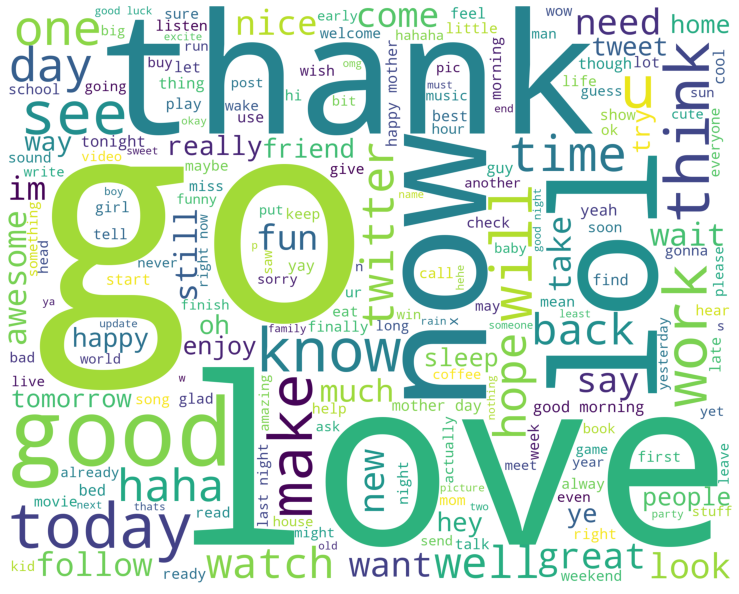

Negative words


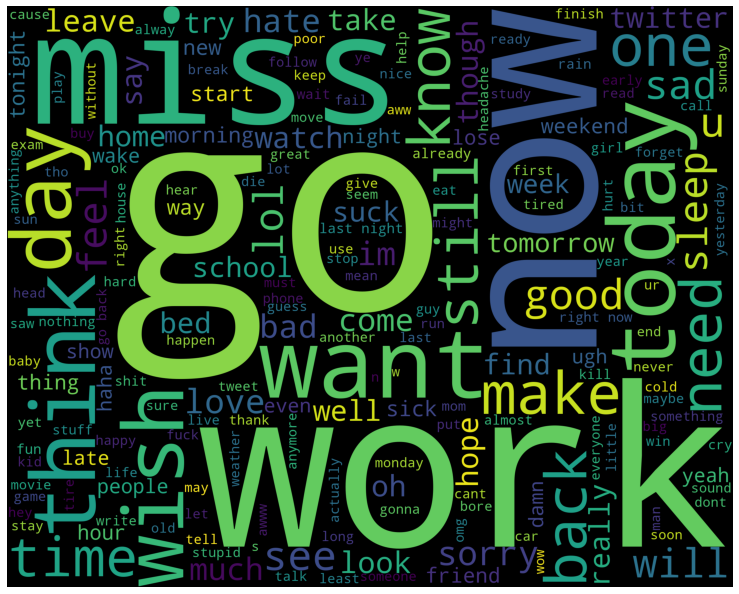

In [19]:
from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []

for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(positive_words, 'white')
print("Negative words")
wordcloud_draw(negative_words)

**Train Test Split**

In [20]:
train, test = train_test_split(newdf, test_size=0.2, random_state=1)
X_train = train['text'].values
X_test = test['text'].values
y_train = train['target']
y_test = test['target']

**TF-IDF Vectorizer**

In [21]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [22]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


## Model Evaluation

In [23]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**LinearSVC**

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     39909
           1       0.80      0.80      0.80     40091

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



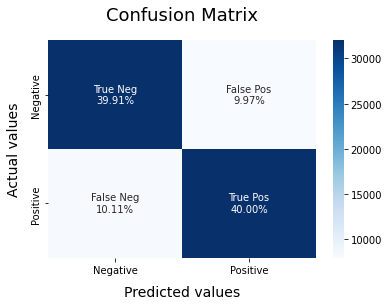

In [24]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     39909
           1       0.81      0.81      0.81     40091

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



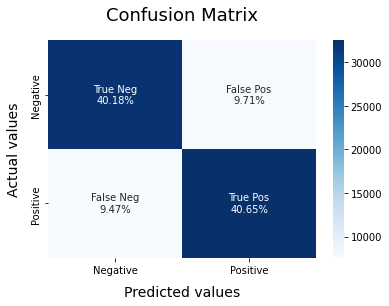

In [25]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

**XGBoost**

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     39909
           1       0.75      0.80      0.77     40091

    accuracy                           0.76     80000
   macro avg       0.76      0.76      0.76     80000
weighted avg       0.76      0.76      0.76     80000



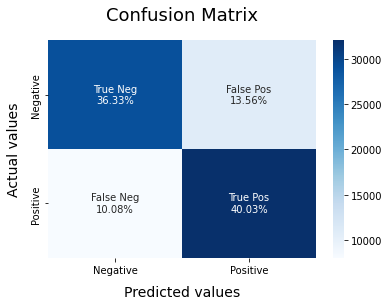

In [26]:
XGB = XGBClassifier()
XGB.fit(X_train,y_train)
model_Evaluate(XGB)

**Bernoulli Naive Bayes**

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     39909
           1       0.78      0.81      0.79     40091

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



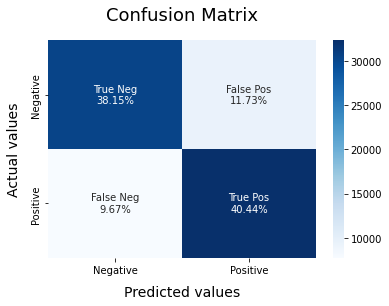

In [27]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

## Conclusion

**Looking at the accuracy and the confusion matrix we can say that Logistic Regression is performing better compared to the other models shown above.**